Htet Khant Linn

Feb 23, 2026

Week 4

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Importing Retail Sales Data

In [75]:
df = pd.read_csv('data/retail_sales.csv', parse_dates=['ds'], index_col=['ds'])

In [76]:
print(df.info())
print(df.head())

<class 'pandas.DataFrame'>
DatetimeIndex: 293 entries, 1992-01-01 to 2016-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       293 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB
None
                 y
ds                
1992-01-01  146376
1992-02-01  147079
1992-03-01  159336
1992-04-01  163669
1992-05-01  170068


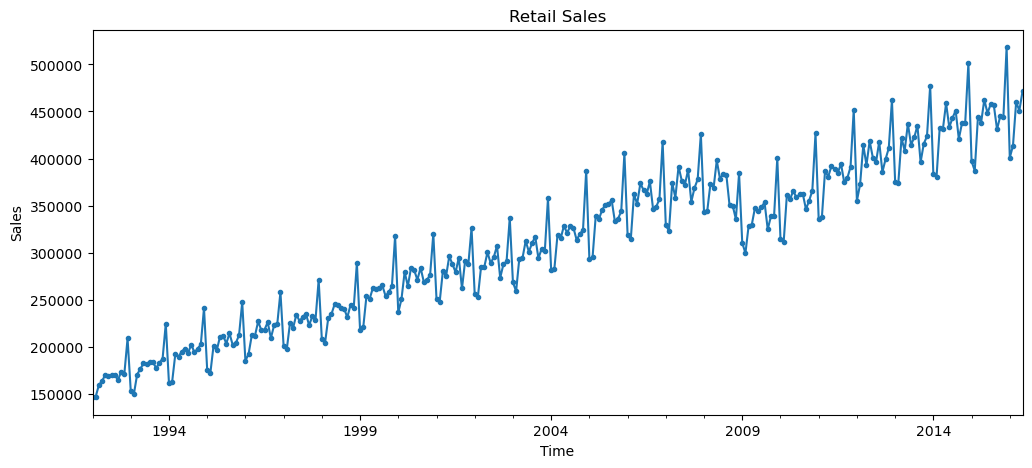

In [77]:
df.y.plot(marker= '.', figsize=(12, 5))
plt.title('Retail Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.savefig('output/retail_sales.png')

plt.show()

## Calculating 3-MA

In [78]:
window_size = 3
ma_3 = df.rolling(
    window = window_size,
    center=True
).mean()

ma_3.rename(columns={'y':'3-MA'}, inplace=True)

In [79]:
print(ma_3.head())

                     3-MA
ds                       
1992-01-01            NaN
1992-02-01  150930.333333
1992-03-01  156694.666667
1992-04-01  164357.666667
1992-05-01  167466.666667


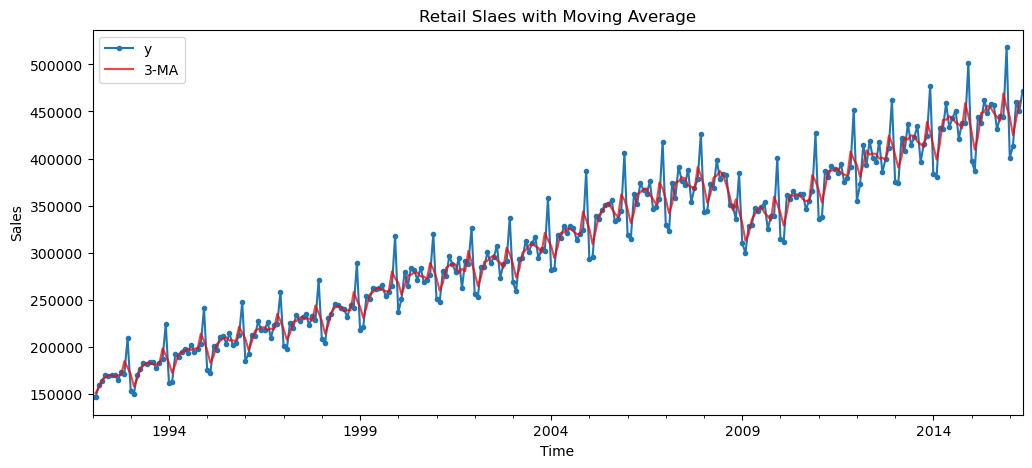

In [80]:
fig, ax = plt.subplots(figsize = [12, 5])
df.plot(ax=ax, marker='.')
ma_3.plot(ax=ax, color='r', alpha=0.75)
ax.set_title('Retail Slaes with Moving Average')
ax.set_xlabel("Time")
ax.set_ylabel("Sales")
plt.savefig('output/retail_sales_with_moving_average.png')

plt.show()

## Calculating 4-MA

In [81]:
df_ = df.copy()

df_["4_ma"] = df_.rolling(window=4).mean()
df_["2x4_ma"] = df_["4_ma"].rolling(window=2).mean()
df_["result"] = df_["2x4_ma"].shift(-2)

## Moving Average - Order of 12 or One Year Period

In [82]:
window_size_12 = 12

ma_2_12 = (
    df.rolling(window=window_size_12)
    .mean()
    .rolling(2)
    .mean()
    .shift(-window_size_12//2)
)

ma_2_12.rename(columns={'y':'ma_2_12'}, inplace=True)

In [83]:
ma_2_12.head()

,ma_2_12
ds,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN


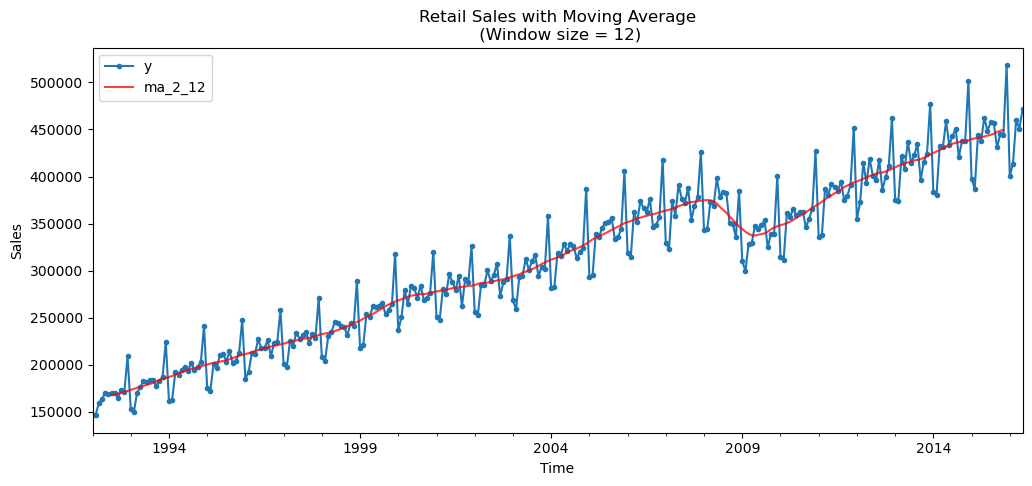

In [84]:
fig, ax = plt.subplots(figsize=[12,5])
df.plot(ax=ax, marker='.')
ma_2_12.plot(ax=ax, color='r', alpha=0.75)

ax.set_title("Retail Sales with Moving Average\n (Window size = 12)")
ax.set_xlabel("Time")
ax.set_ylabel("Sales")
plt.savefig("output/retail_sales_with_12_ma.png")

plt.show()

## Calculating Trends and Seasonality

In [85]:
# Library Insatllation
# from statsmodels.tsa.seasonal import seasonal_decompose

df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 293 entries, 1992-01-01 to 2016-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       293 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [86]:
df2 = df.copy()

In [87]:
df2['trend'] = (
    df2.rolling(window=window_size_12)
    .mean()
    .rolling(window=2)
    .mean()
    .shift(-window_size_12//2)
)

df2.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 293 entries, 1992-01-01 to 2016-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       293 non-null    int64  
 1   trend   281 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.9 KB


In [88]:
df2['y_detrended'] = df2['y'] - df2['trend']

df2['month'] = df2.index.month
print(df2.head())

                 y  trend  y_detrended  month
ds                                           
1992-01-01  146376    NaN          NaN      1
1992-02-01  147079    NaN          NaN      2
1992-03-01  159336    NaN          NaN      3
1992-04-01  163669    NaN          NaN      4
1992-05-01  170068    NaN          NaN      5


In [89]:
seasonality = df2.groupby('month').mean()['y_detrended']
seasonality.name = 'seasonality'
print(seasonality)

month
1    -31085.898551
2    -32941.297101
3      3032.637681
4     -2933.978261
5     13554.688406
6      4457.835145
7      4140.364583
8     10267.178819
9    -11945.057292
10    -3233.472222
11    -1135.296875
12    47751.626812
Name: seasonality, dtype: float64


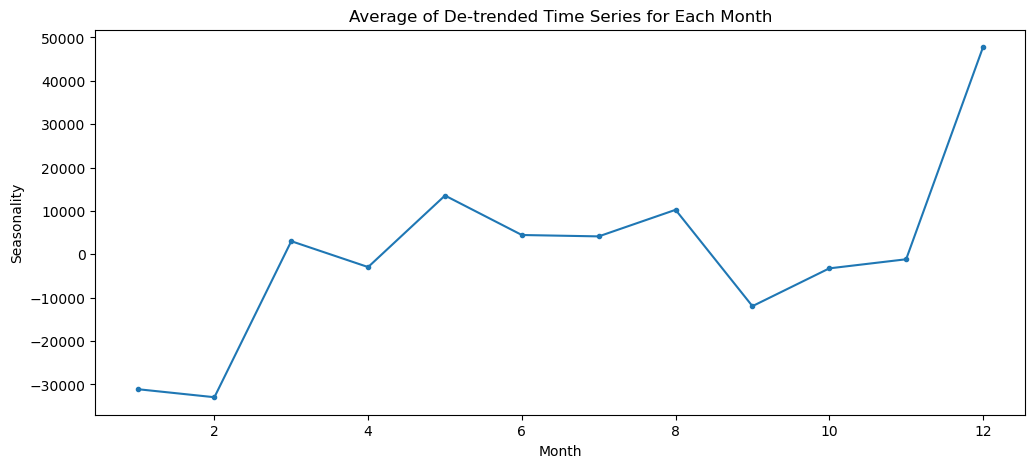

In [90]:
fig, ax = plt.subplots(figsize = [12, 5])
seasonality.plot(y='seasonality', ax=ax, marker='.')
ax.set_xlabel('Month')
ax.set_ylabel('Seasonality')
ax.set_title('Average of De-trended Time Series for Each Month')

plt.savefig('output/avg_detrended_ts_for_each_month.png')
plt.show()

In [91]:
df2 = df2.merge(right=seasonality, left_on='month', right_index=True)
df2 = df2.sort_index()
df2.head()

,y,trend,y_detrended,month,seasonality
ds,,,,,
1992-01-01,146376,NaN,NaN,1,-31085.898551
1992-02-01,147079,NaN,NaN,2,-32941.297101
1992-03-01,159336,NaN,NaN,3,3032.637681
1992-04-01,163669,NaN,NaN,4,-2933.978261
1992-05-01,170068,NaN,NaN,5,13554.688406


In [92]:
df2['residual'] = df2['y'] - df2['trend'] - df2['seasonality']

In [ ]:
print(df2.columns.tolist())

['y']


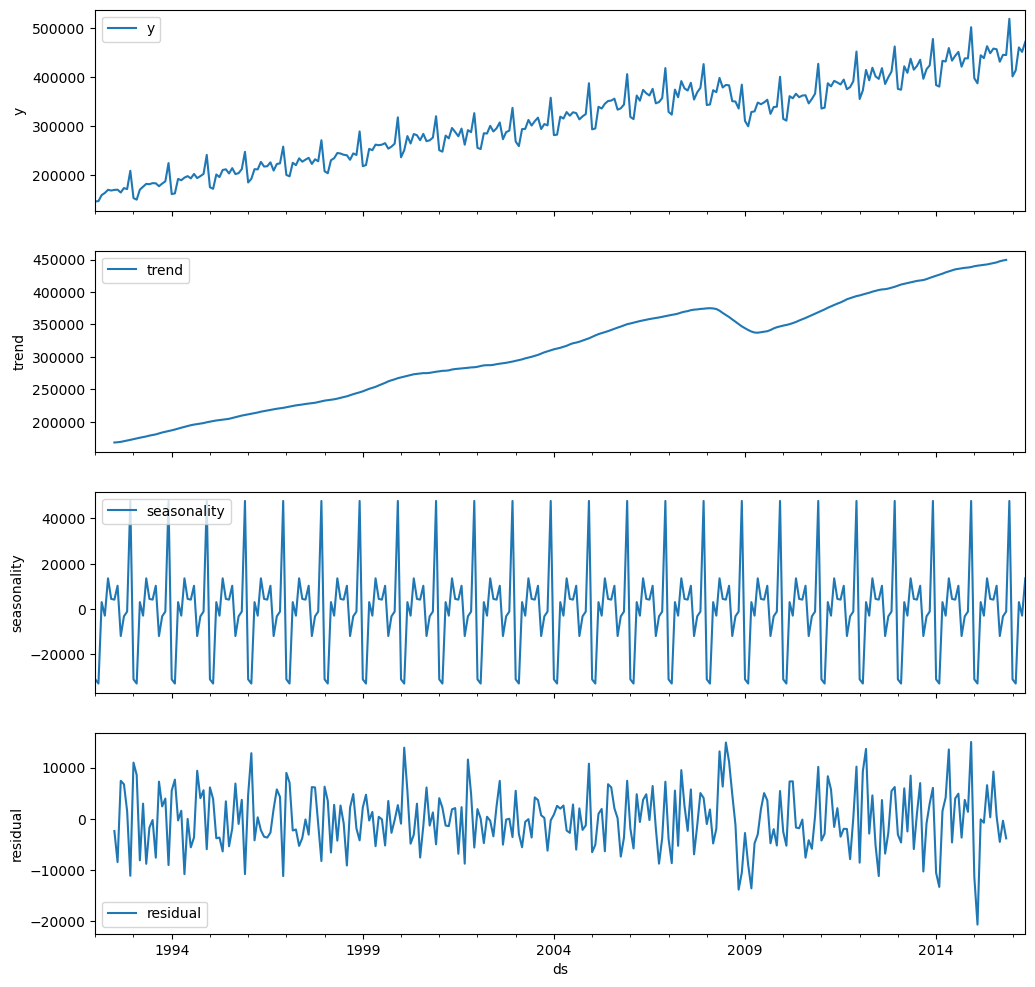

In [98]:
fig, ax = plt.subplots(nrows=4, figsize=[12, 12], sharex=True)
df2['y'].plot(ax=ax[0], legend='y')
ax[0].set_ylabel('y')

df2['trend'].plot(ax=ax[1], legend='trend')
ax[1].set_ylabel('trend')

df2['seasonality'].plot(ax=ax[2], legend='seasonality')
ax[2].set_ylabel('seasonality')

df2['residual'].plot(ax=ax[3], legend='residual')
ax[3].set_ylabel('residual')

plt.savefig('output/trend_seasonality_residual_manual.png')
plt.show()

## Using Seasonal Decompose Module

In [ ]:
# seasonal decomposition using moving average

res = seasonal_decompose(
    x=df2['y'],
    model='additive',
    period=12
)

In [103]:
print(res.trend.head(10))
print(res.seasonal.head(10))

ds
1992-01-01              NaN
1992-02-01              NaN
1992-03-01              NaN
1992-04-01              NaN
1992-05-01              NaN
1992-06-01              NaN
1992-07-01    168127.041667
1992-08-01    168537.583333
1992-09-01    169125.541667
1992-10-01    170120.958333
Name: trend, dtype: float64
ds
1992-01-01   -31080.009479
1992-02-01   -32935.408030
1992-03-01     3038.526752
1992-04-01    -2928.089190
1992-05-01    13560.577477
1992-06-01     4463.724216
1992-07-01     4146.253655
1992-08-01    10273.067891
1992-09-01   -11939.168220
1992-10-01    -3227.583151
Name: seasonal, dtype: float64


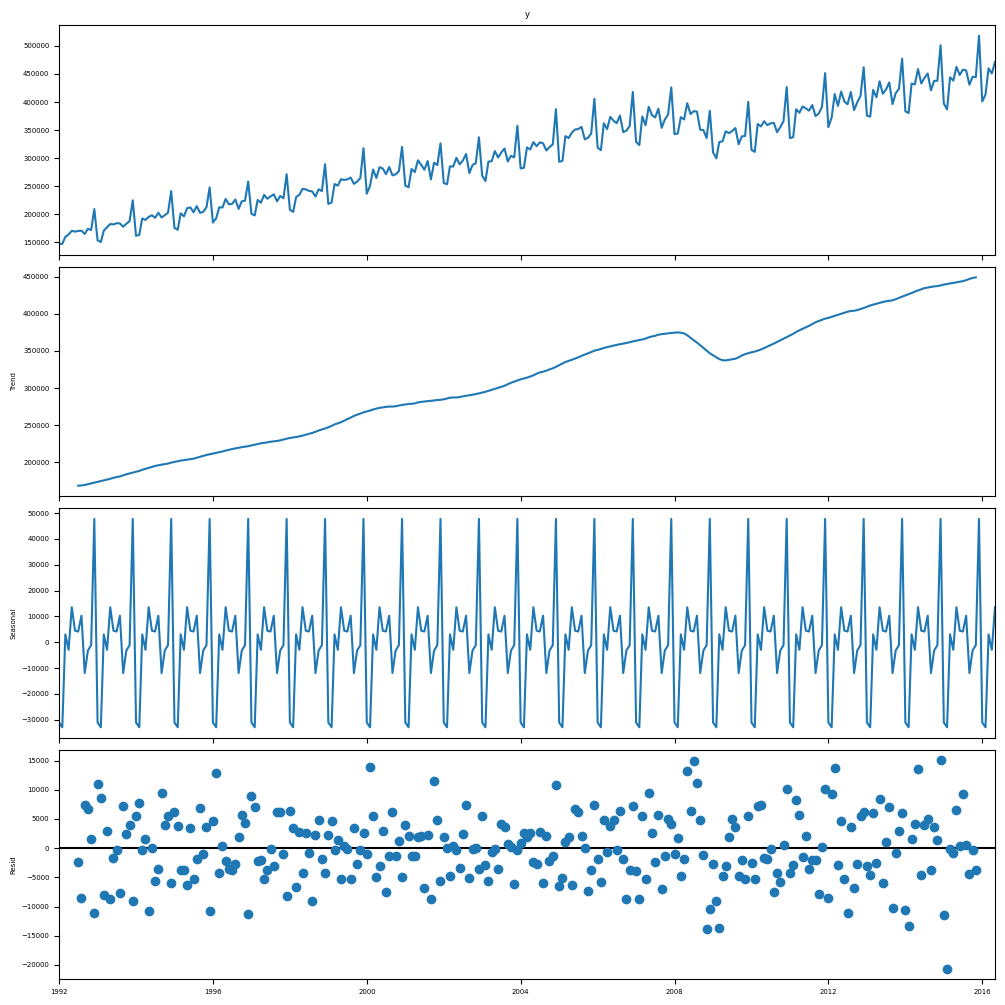

In [ ]:
plt.rc('figure', figsize=(10,10))
plt.rc('font', size=5)
res.plot();